In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import FVMtools as fvm
import time

In [9]:
def columnmodel(t,y,N,h,D,v,cin0,A1,A1f,A2,A2f,B1,B0):
    # Inputs
    c = y[:N]
    # Feed concentration:
    if t < 10:
        cin = 0
    elif t < 20:
        cin = cin0
    else:
        cin = 0
    # Derivatives
    dc = D*(A2@c + A2f@(B1@c + B0*cin)) \
    - v*(A1@c + A1f@(B1@c + B0*cin))
    # Output
    dydt = dc
    return dydt

In [10]:
def dispcolumn_structure(N=100, A1type='2pb', A2type='3pc'):
    # Simulates the response from a 10 second pulse in a dispersion column
    # Change discretization type or number of grid points to see the effect on
    # the solution
    #
    # Syntax: dispcolumn(N, A1type, A2type)
    # N = number of grid points
    # A1type = FVMdisc1st approximation type (e.g. '2pb', '5p3b')
    # A2type = FVMdisc2nd approximation type (e.g. '3pc', '5pc')
    # Measures simulation time (tic-toc)
    # Constants
    L = 1
    D = 1e-6
    v = 0.1
    cin = 1
    h = L/N
    # Discretization
    [A1, A1f] = fvm.FVMdisc1st(N, h, A1type)
    [A2,A2f] = fvm.FVMdisc2nd(N, h, A2type)
    [B1,B0] = fvm.FVMdiscBV(N, h, [0, 1], [[1, -cin], [0, 0]])
    # Solve
    tspan = [0, 100]
    yinit = np.zeros(N)
    sol = solve_ivp(lambda t, y: columnmodel(t,y,N,h,D,v,cin,A1,A1f,A2,A2f,B1,B0),\
    tspan, yinit, method = 'BDF', max_step=9)
    t = sol.t
    y = sol.y.T
    plt.plot(t, y[:,-1], label=f'{N} {A1type} {A2type} structure')
    plt.legend()
    plt.draw() # needed to update the plot if run several times
    plt.show(block=False)
    # Prints simulation time

In [11]:

def dispcolumn_jpattern(N=100, A1type='2pb', A2type='3pc'):
    # Simulates the response from a 10 second pulse in a dispersion column
    # Change discretization type or number of grid points to see the effect on
    # the solution
    #
    # Syntax: dispcolumn(N, A1type, A2type)
    # N = number of grid points
    # A1type = FVMdisc1st approximation type (e.g. '2pb', '5p3b')
    # A2type = FVMdisc2nd approximation type (e.g. '3pc', '5pc')
    # Measures simulation time (tic-toc)
    # Constants
    L = 1
    D = 1e-6
    v = 0.1
    cin = 1
    h = L/N
    # Discretization
    [A1, A1f] = fvm.FVMdisc1st(N, h, A1type)
    [A2,A2f] = fvm.FVMdisc2nd(N, h, A2type)
    [B1,B0] = fvm.FVMdiscBV(N, h, [0, 1], [[1, -cin], [0, 0]])
    # ODE options
    # Set jpattern
    JP = fvm.FVMjpattern(lambda t,y: columnmodel(t,y,N,h,D,v,cin,A1,A1f,A2,A2f,B1,B0),N
    )
    # Solve
    tspan = [0, 100]
    yinit = np.zeros(N)
    sol = solve_ivp(lambda t, y: columnmodel(t,y,N,h,D,v,cin,A1,A1f,A2,A2f,B1,B0),\
    tspan, yinit, method = 'BDF', max_step=9, jac_sparsity=JP)
    t = sol.t
    y = sol.y.T
    plt.plot(t, y[:,-1], label=f'{N} {A1type} {A2type} jpattern')
    plt.legend()
    plt.draw() # needed to update the plot if run several times
    plt.show(block=False)

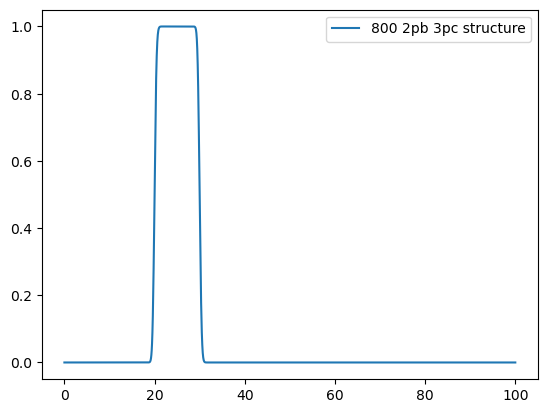

In [12]:
dispcolumn_structure(800,'2pb','3pc')

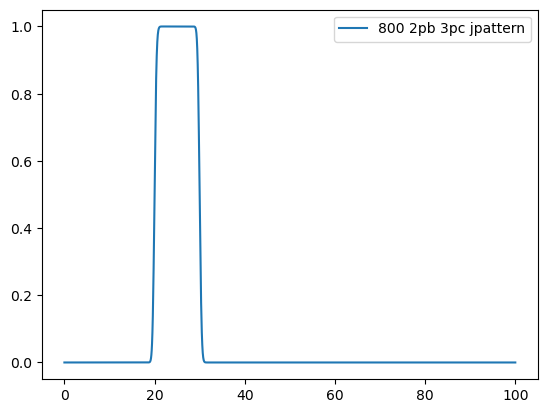

In [13]:
dispcolumn_jpattern(800,'2pb','3pc')